In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("chip_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [4]:
df.shape

(4854, 14)

In [5]:
df.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

unuse columns are remove

In [7]:
data = df.iloc[:,0:11]

In [8]:
sorted_df = data.sort_values(by=[ 'Process Size (nm)','Freq (MHz)','TDP (W)','Transistors (million)'], ascending=[ True,False,False,False])

In [9]:
sorted_df =sorted_df[sorted_df['Process Size (nm)'] != 0]
sorted_df.head(10)

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
1897,1897,AMD Ryzen Threadripper PRO 3945WX,CPU,2020-07-14,7.0,280.0,74.0,3800.0,4000.0,TSMC,AMD
589,589,AMD Ryzen 3 5300G,CPU,2021-04-13,7.0,65.0,NaN,NaN,4000.0,TSMC,AMD
83,83,AMD Ryzen Threadripper PRO 3955WX,CPU,2020-07-14,7.0,280.0,74.0,3800.0,3900.0,TSMC,AMD
874,874,AMD Ryzen 9 3900XT,CPU,2020-07-07,7.0,105.0,74.0,3800.0,3900.0,TSMC,AMD
2058,2058,AMD Ryzen 7 3800X,CPU,2019-07-07,7.0,105.0,74.0,3800.0,3900.0,TSMC,AMD
498,498,AMD Ryzen 5 5600G,CPU,2021-04-13,7.0,65.0,NaN,NaN,3900.0,TSMC,AMD
2107,2107,AMD Ryzen Threadripper 3960X,CPU,2019-11-25,7.0,280.0,74.0,3800.0,3800.0,TSMC,AMD
721,721,AMD Ryzen 9 3900X,CPU,2019-07-07,7.0,105.0,74.0,3800.0,3800.0,TSMC,AMD
1447,1447,AMD Ryzen 7 3800XT,CPU,2020-07-07,7.0,105.0,74.0,3800.0,3800.0,TSMC,AMD
1953,1953,AMD Ryzen 7 5800X,CPU,2020-11-05,7.0,105.0,NaN,NaN,3800.0,TSMC,AMD


In [10]:
cpu_df = sorted_df[sorted_df['Type'] == 'CPU']
gpu_df = sorted_df[sorted_df['Type'] == 'GPU']

In [11]:
cpu_df.head(10)

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
1897,1897,AMD Ryzen Threadripper PRO 3945WX,CPU,2020-07-14,7.0,280.0,74.0,3800.0,4000.0,TSMC,AMD
589,589,AMD Ryzen 3 5300G,CPU,2021-04-13,7.0,65.0,NaN,NaN,4000.0,TSMC,AMD
83,83,AMD Ryzen Threadripper PRO 3955WX,CPU,2020-07-14,7.0,280.0,74.0,3800.0,3900.0,TSMC,AMD
874,874,AMD Ryzen 9 3900XT,CPU,2020-07-07,7.0,105.0,74.0,3800.0,3900.0,TSMC,AMD
2058,2058,AMD Ryzen 7 3800X,CPU,2019-07-07,7.0,105.0,74.0,3800.0,3900.0,TSMC,AMD
498,498,AMD Ryzen 5 5600G,CPU,2021-04-13,7.0,65.0,NaN,NaN,3900.0,TSMC,AMD
2107,2107,AMD Ryzen Threadripper 3960X,CPU,2019-11-25,7.0,280.0,74.0,3800.0,3800.0,TSMC,AMD
721,721,AMD Ryzen 9 3900X,CPU,2019-07-07,7.0,105.0,74.0,3800.0,3800.0,TSMC,AMD
1447,1447,AMD Ryzen 7 3800XT,CPU,2020-07-07,7.0,105.0,74.0,3800.0,3800.0,TSMC,AMD
1953,1953,AMD Ryzen 7 5800X,CPU,2020-11-05,7.0,105.0,NaN,NaN,3800.0,TSMC,AMD


In [12]:
gpu_df.head(10)

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
3013,3013,AMD Radeon RX 6700 XT,GPU,2021-03-03,7.0,230.0,335.0,17200.0,2321.0,TSMC,AMD
4015,4015,AMD Radeon RX 6800M,GPU,2021-01-01,7.0,230.0,335.0,17200.0,2321.0,TSMC,AMD
4381,4381,AMD Playstation 5 GPU,GPU,2020-11-12,7.0,180.0,308.0,NaN,2233.0,TSMC,AMD
3003,3003,AMD Radeon RX 6800 XT,GPU,2020-10-28,7.0,300.0,520.0,26800.0,1825.0,TSMC,AMD
3843,3843,AMD Radeon RX 6900 XT,GPU,2020-10-28,7.0,300.0,520.0,26800.0,1825.0,TSMC,AMD
3215,3215,AMD Xbox Series X GPU,GPU,2020-11-10,7.0,200.0,360.0,15300.0,1825.0,TSMC,AMD
4178,4178,AMD Radeon Pro W5500,GPU,2020-02-10,7.0,125.0,158.0,6400.0,1744.0,TSMC,AMD
2204,2204,AMD Radeon RX 6800,GPU,2020-10-28,7.0,250.0,520.0,26800.0,1700.0,TSMC,AMD
4443,4443,AMD Radeon RX 5700 XT 50th Anniversary,GPU,2019-07-07,7.0,225.0,251.0,10300.0,1680.0,TSMC,AMD
3370,3370,AMD Radeon RX 5300 XT,GPU,2019-10-07,7.0,100.0,158.0,6400.0,1670.0,TSMC,AMD


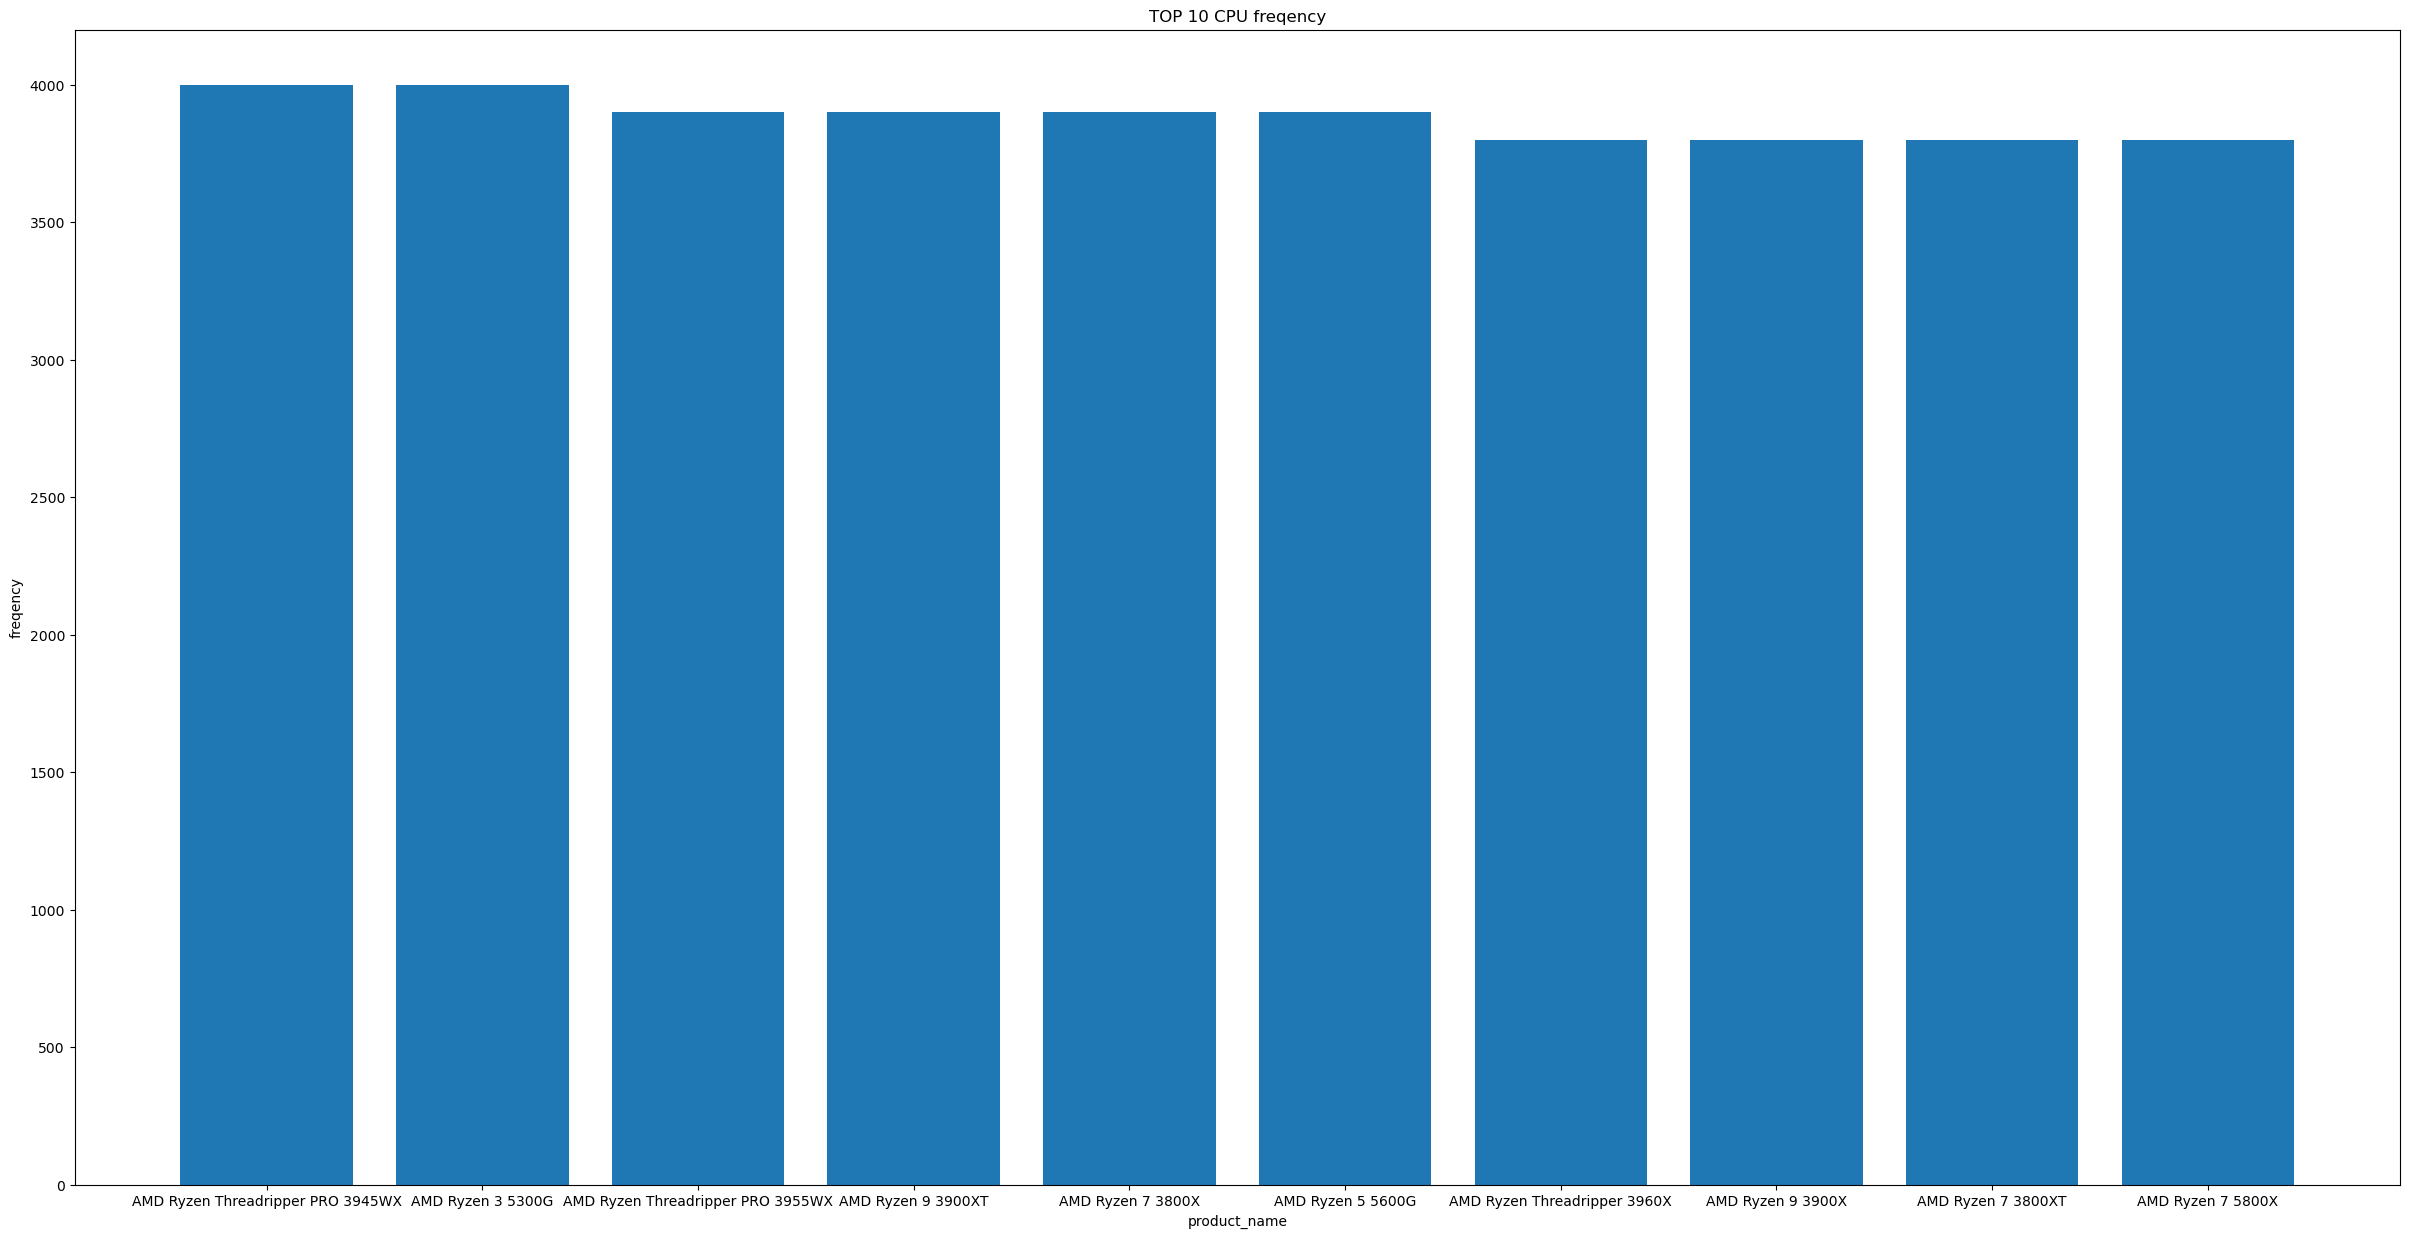

In [17]:
fig = plt.figure(figsize=(35,15))
product_name = cpu_df["Product"]
freq =cpu_df["Freq (MHz)"]
plt.bar(product_name[0:10],freq[0:10])
plt.xlabel("product_name")
plt.ylabel("freqency")
plt.title("TOP 10 CPU freqency")
plt.show()

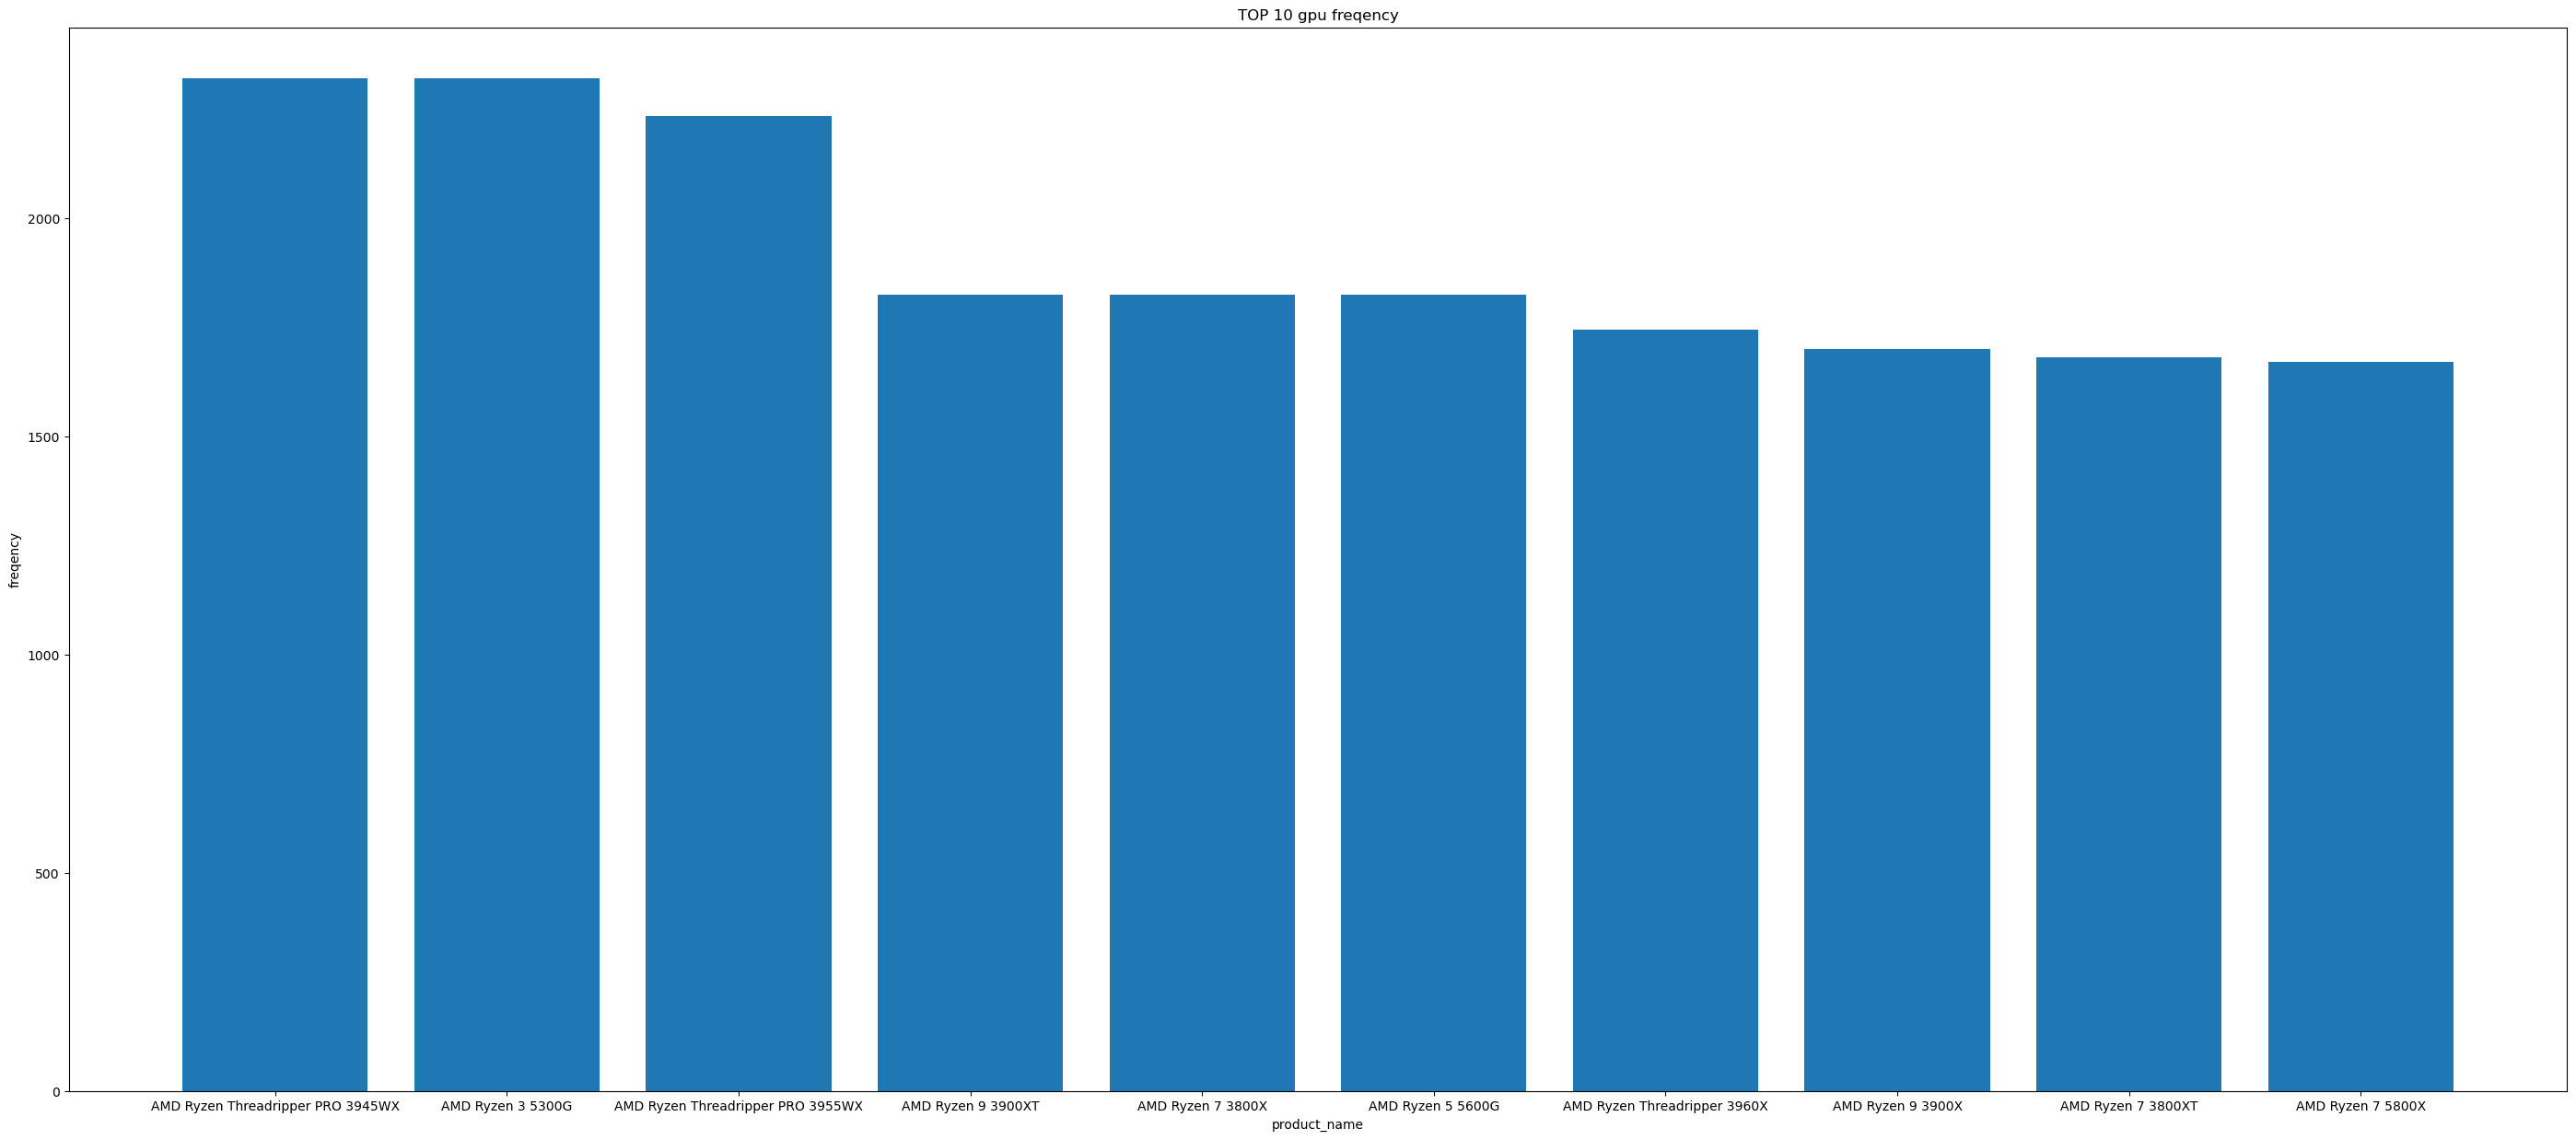

In [18]:
fig = plt.figure(figsize=(35,15))
product_name = cpu_df["Product"]
freq = gpu_df["Freq (MHz)"]
plt.bar(product_name[0:10],freq[0:10])
plt.xlabel("product_name")
plt.ylabel("freqency")
plt.title("TOP 10 gpu freqency")
plt.show()